In [107]:
!pip install opencv-python-headless

In [108]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from numpy import array
import cv2
import numpy as np
import os
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd

In [ ]:
import os

root='/content/gdrive/MyDrive/Colab Notebooks/Handwritten Signature Data/gray_scale'

for i in range(0,16):
  os.mkdir(os.path.join(root, f'signature_{i+1}'))

In [ ]:
# for renaming the folders and images

from google.colab import drive
drive.mount('/content/drive')

data_dir = '/content/gdrive/My Drive/Colab Notebooks/Handwritten Signature Data/data'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))  

In [ ]:
# Code for Gray scale
import os
import cv2 as cv2

import cv2
from google.colab.patches import cv2_imshow 

directory = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\data"


# gray_path= '/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Data_Augmentation'
gray_path= 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale'
def gray(directory):
  for root, dirs, files in os.walk(directory):
      for i, directory in enumerate(dirs): 
        print(i+1,directory)
        # print(gray_path,i)
        old_dir= os.path.join(root,directory)
       
        old_gray= os.path.join (gray_path,f'signature_{i+1}')
        # print(old_dir)
        print(old_gray)
        # new_dir= os.path.join(old_dir,f'signature_{i+1}')
        # print(new_dir)
        for j,file_name in enumerate((os.listdir(old_dir))):
            # print(j+1,file_name)
            # new_dir= os.path.join(old_dir,f'signature_{i+1}_{j+1}.jpg')
            # new_gray = os.path.join(old_gray,f'signature_{j+1}.jpg')
            # print(new_dir)
            # print(new_gray)
            filename= f'signature_{j+1}.jpg'
            # print(filename)
            img =  cv2.imread((os.path.join(old_dir,filename))) #image read for gray scale 
        
          
            
            gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            cv2.imwrite((os.path.join(old_gray,f'signature_{j+1}.jpg')),gray)
            # cv2_imshow(gray)
            # cv2.waitKey(0)
        

gray(directory)

In [4]:
pip install Augmentor

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import Augmentor

# /content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Gray_scale

# p = Augmentor.Pipeline('/content/drive/MyDrive/Colab Notebooks/PROJECT codes/DATASET/Hand_Sign_Data')

p = Augmentor.Pipeline('C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale')  # gray image source path

In [ ]:
p.rotate(probability = 0.7,max_left_rotation=10,max_right_rotation=10)

p.rotate(probability=1, max_left_rotation=5, max_right_rotation=5)

p.rotate270(probability=0.5)

p.flip_left_right(probability=0.5)

p.flip_top_bottom(probability=0.5)

p.zoom_random(probability=0.5, percentage_area=0.8)

# p.zoom(probability=0.3,min_factor=1.1,max_factor=1.6)

p.skew_left_right(0.5,0.3)

p.skew_top_bottom(0.5,0.5)
p.resize(1,519,276)
p.random_distortion(0.5,4,6,5) #probability, grid width, height,magnitude
p.shear(1,10,11) # prob, max_shear_left, max_shear_right


In [ ]:
p.sample(1600)

In [ ]:
# To rename Augmented Data

data_dir = 'C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output'

def rename_folders(data_dir):
    for root, dirs, files in os.walk(data_dir):
        for i, directory in enumerate(dirs):
            old_dir_path = os.path.join(root, directory)
            new_dir_path = os.path.join(root, f'subject_{i+1}')
            os.rename(old_dir_path, new_dir_path)

            for j, file_name in enumerate(os.listdir(new_dir_path)):
                old_file_path = os.path.join(new_dir_path, file_name)
                new_file_name = f'signature_{j+1}.jpg'
                new_file_path = os.path.join(new_dir_path, new_file_name)
                os.rename(old_file_path, new_file_path)
                # cv2.imread(new_file_path, cv2.IMREAD_GRAYSCALE)
print(rename_folders(data_dir))

In [6]:
pip install split-folders[full]

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import splitfolders
input_folder = "C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\gray_scale\output"
splitfolders.ratio (input_folder, output="C:\Users\Lenovo\Desktop\Project\Handwritten Signature Data\splitted_gray_data_65_35",
                seed=42, ratio=(.65,.35),
                group_prefix=None)

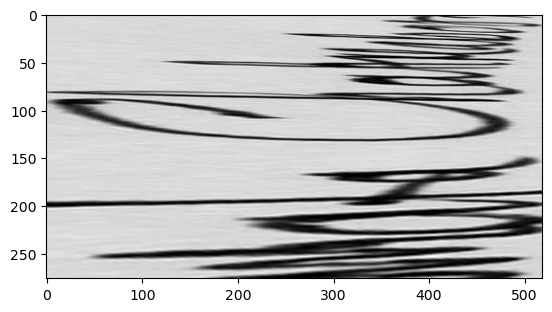

In [6]:
img = image.load_img('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//train//subject_1//signature_11.jpg')
plt.imshow(img)
# print(img.shape)

In [7]:
print(cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//train//subject_1//signature_11.jpg').shape)
cv2.imread('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//train//subject_1//signature_11.jpg')

(276, 519, 3)


array([[[223, 223, 223],
        [222, 222, 222],
        [222, 222, 222],
        ...,
        [ 87,  87,  87],
        [ 76,  76,  76],
        [ 67,  67,  67]],

       [[218, 218, 218],
        [217, 217, 217],
        [217, 217, 217],
        ...,
        [214, 214, 214],
        [212, 212, 212],
        [210, 210, 210]],

       [[218, 218, 218],
        [218, 218, 218],
        [217, 217, 217],
        ...,
        [222, 222, 222],
        [221, 221, 221],
        [221, 221, 221]],

       ...,

       [[212, 212, 212],
        [213, 213, 213],
        [213, 213, 213],
        ...,
        [215, 215, 215],
        [216, 216, 216],
        [216, 216, 216]],

       [[215, 215, 215],
        [215, 215, 215],
        [216, 216, 216],
        ...,
        [218, 218, 218],
        [219, 219, 219],
        [220, 220, 220]],

       [[218, 218, 218],
        [218, 218, 218],
        [218, 218, 218],
        ...,
        [220, 220, 220],
        [221, 221, 221],
        [221, 221, 221]]

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
#RUN FROM HERE

batch_size=50 #20  #15

train_datagen = ImageDataGenerator(rescale= 1./255,)

test_datagen= ImageDataGenerator(rescale=1./255)



In [111]:
train_generator=train_datagen.flow_from_directory('C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//train', # "train folder location"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

# same generator for validation data

validation_generator=test_datagen.flow_from_directory("C://Users//Lenovo//Desktop//Project//Handwritten Signature Data//splitted_gray_data_65_35//val",           #"validation image folder new loaction"
    target_size=(519,276),
    batch_size=batch_size,color_mode='grayscale',
    
    classes = ['subject_1','subject_2','subject_3','subject_4','subject_5','subject_6','subject_7','subject_8','subject_9','subject_10','subject_11','subject_12','subject_13','subject_14','subject_15','subject_16'],
    # classes = ['faculty_1','faculty_2','faculty_3','faculty_4','faculty_5','faculty_6','faculty_7','faculty_8','faculty_9','faculty_10','faculty_11','faculty_12','faculty_13','faculty_14','faculty_15','faculty_16'],
    class_mode='categorical'
)

Found 1195 images belonging to 16 classes.
Found 567 images belonging to 16 classes.


In [112]:
num_samples = len(train_generator)
x_train = []
y_train = []
for i in range(num_samples):
    x_batch, y_batch = next(train_generator)
    x_train.append(x_batch)
    y_train.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

num_samples = len(validation_generator)
x_val = []
y_val = []
for i in range(num_samples):
    x_batch, y_batch = next(validation_generator)
    x_val.append(x_batch)
    y_val.append(y_batch)

# Concatenate the batches to obtain the full x_train and y_train
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)


## 25 Epoch

In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=25, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/25
38/38 [==============================] - 188s 3s/step - loss: 2.8139 - accuracy: 0.0720 - val_loss: 2.7718 - val_accuracy: 0.0776
Epoch 2/25
38/38 [==============================] - 97s 3s/step - loss: 2.7727 - accuracy: 0.0887 - val_loss: 2.7635 - val_accuracy: 0.0794
Epoch 3/25
38/38 [==============================] - 87s 2s/step - loss: 2.7668 - accuracy: 0.0762 - val_loss: 2.7611 - val_accuracy: 0.0935
Epoch 4/25
38/38 [==============================] - 94s 2s/step - loss: 2.7643 - accuracy: 0.0770 - val_loss: 2.7601 - val_accuracy: 0.0741
Epoch 5/25
38/38 [==============================] - 108s 3s/step - loss: 2.7533 - accuracy: 0.0820 - val_loss: 2.7513 - val_accuracy: 0.1023
Epoch 6/25
38/38 [==============================] - 104s 3s/step - loss: 2.7470 - accuracy: 0.0929 - val_loss: 2.7483 - val_accuracy: 0.0776
Epoch 7/25
38/38 [==============================] - 107s 3s/step - loss: 2.7382 - accuracy: 0.0962 - val_loss: 2.7493 - val_accuracy: 0.0899
Epoch 8/25
38/38

In [114]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 16s 716ms/step - loss: 2.4756 - accuracy: 0.1869
Test Loss: 2.4755935668945312
Test Accuracy: 0.18694885075092316
18/18 [==============================] - 33s 714ms/step


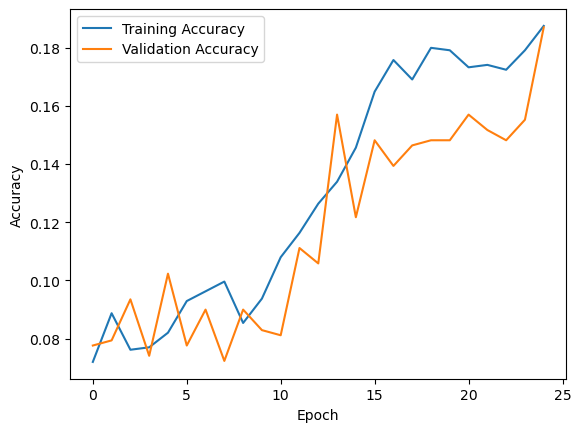

In [115]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

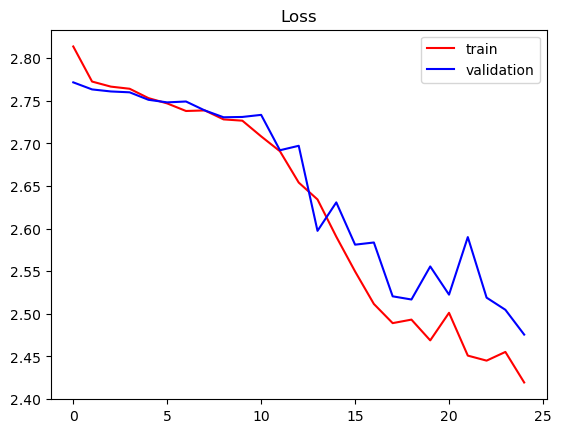

In [116]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [117]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 14s 613ms/step
Confusion Matrix:
[[ 0  2  1  0  1  1  6  4  2  0  3  0  0  0  0  8]
 [ 0 15  1  0  0  0  3  5  2  0  2  0  2  0  0  9]
 [ 0  2  3  1  0  1 14  2  3  0  1  0  1  0  0 13]
 [ 0  4  0  6  0  0  0 22  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  0  0 14  1  4  0  0  1  2  0  1  5]
 [ 0  5  0  0  0  2  1 12  0  0  1  0  0  0  1 11]
 [ 0  0  0  0  0  0 29  0  6  0  0  0  1  0  0  4]
 [ 0  4  1  2  0  0  2 20  0  0  0  0  1  0  0  8]
 [ 0  0  0  0  0  0 24  0 11  0  0  0  0  0  0  0]
 [ 0  3  1  0  0  0  8  2  5  0  4  0  3  0  1  6]
 [ 0  2  0  0  0  0  9  4  2  0  5  0  2  0  4  8]
 [ 0  3  2  0  0  1  7  8  3  0  4  1  2  0  3  9]
 [ 0  3  0  0  0  0 14  1  6  0  0  0  1  0  1  8]
 [ 0  3  1  0  0  1  0 20  0  0  1  1  0  0  1  3]
 [ 0  0  2  0  0  0 10  2  5  0  3  0  1  0  0 15]
 [ 0  1  2  0  0  0  9  1  9  0  0  0  0  0  1 13]]


18/18 [==============================] - 13s 598ms/step


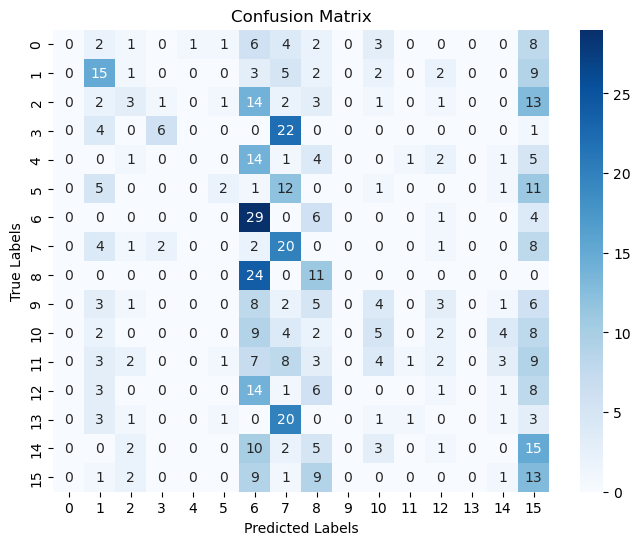

In [118]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [119]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3846, FPR = 0.0606, TNR = 0.9394, FNR = 0.6154
Class 2: TPR = 0.0732, FPR = 0.0228, TNR = 0.9772, FNR = 0.9268
Class 3: TPR = 0.1818, FPR = 0.0056, TNR = 0.9944, FNR = 0.8182
Class 4: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 5: TPR = 0.0606, FPR = 0.0075, TNR = 0.9925, FNR = 0.9394
Class 6: TPR = 0.7250, FPR = 0.2296, TNR = 0.7704, FNR = 0.2750
Class 7: TPR = 0.5263, FPR = 0.1588, TNR = 0.8412, FNR = 0.4737
Class 8: TPR = 0.3143, FPR = 0.0883, TNR = 0.9117, FNR = 0.6857
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.1389, FPR = 0.0358, TNR = 0.9642, FNR = 0.8611
Class 11: TPR = 0.0233, FPR = 0.0038, TNR = 0.9962, FNR = 0.9767
Class 12: TPR = 0.0294, FPR = 0.0281, TNR = 0.9719, FNR = 0.9706
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0246, TNR = 0.9754, FNR = 1.0000
Class 15: TPR = 0.3611, FPR = 0.203

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


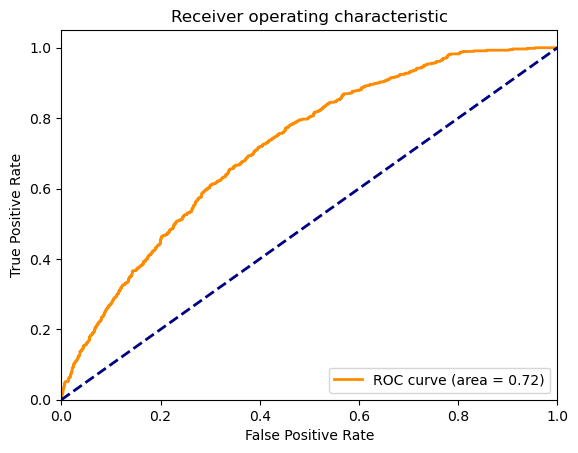

In [120]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 13s 632ms/step - loss: 2.4756 - accuracy: 0.1869
Test Loss: 2.4755935668945312
Test Accuracy: 0.18694885075092316
18/18 [==============================] - 12s 623ms/step
AUC for class 0: 0.5323
AUC for class 1: 0.7472
AUC for class 2: 0.6106
AUC for class 3: 0.9374
AUC for class 4: 0.7122
AUC for class 5: 0.7371
AUC for class 6: 0.8424
AUC for class 7: 0.7979
AUC for class 8: 0.8813
AUC for class 9: 0.6233
AUC for class 10: 0.6715
AUC for class 11: 0.5414
AUC for class 12: 0.6833
AUC for class 13: 0.8438
AUC for class 14: 0.6202
AUC for class 15: 0.6720


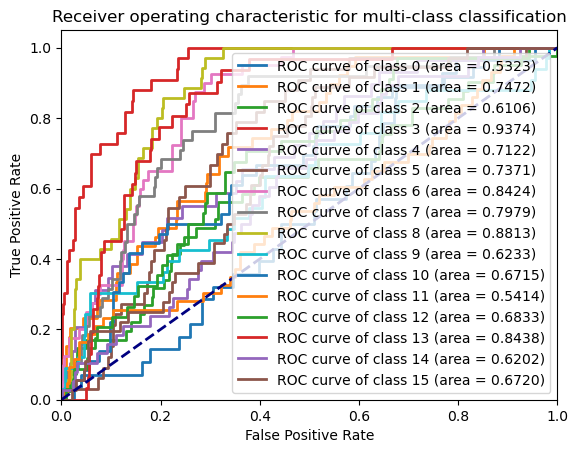

In [121]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 30 Epoch

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=30, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/30
38/38 [==============================] - 260s 2s/step - loss: 2.8100 - accuracy: 0.0695 - val_loss: 2.7668 - val_accuracy: 0.0952
Epoch 2/30
38/38 [==============================] - 87s 2s/step - loss: 2.7637 - accuracy: 0.0828 - val_loss: 2.7694 - val_accuracy: 0.0847
Epoch 3/30
38/38 [==============================] - 75s 2s/step - loss: 2.7685 - accuracy: 0.0828 - val_loss: 2.7512 - val_accuracy: 0.0794
Epoch 4/30
38/38 [==============================] - 79s 2s/step - loss: 2.7574 - accuracy: 0.0770 - val_loss: 2.7458 - val_accuracy: 0.1058
Epoch 5/30
38/38 [==============================] - 76s 2s/step - loss: 2.7445 - accuracy: 0.0870 - val_loss: 2.7486 - val_accuracy: 0.0829
Epoch 6/30
38/38 [==============================] - 74s 2s/step - loss: 2.7417 - accuracy: 0.0787 - val_loss: 2.7393 - val_accuracy: 0.0899
Epoch 7/30
38/38 [==============================] - 73s 2s/step - loss: 2.7331 - accuracy: 0.1054 - val_loss: 2.7295 - val_accuracy: 0.0829
Epoch 8/30
38/38 [=

In [123]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 9s 476ms/step - loss: 2.4350 - accuracy: 0.1852
Test Loss: 2.4350152015686035
Test Accuracy: 0.18518517911434174
18/18 [==============================] - 49s 552ms/step


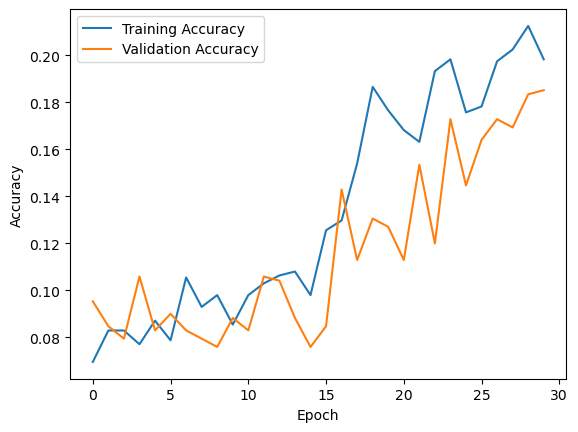

In [124]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

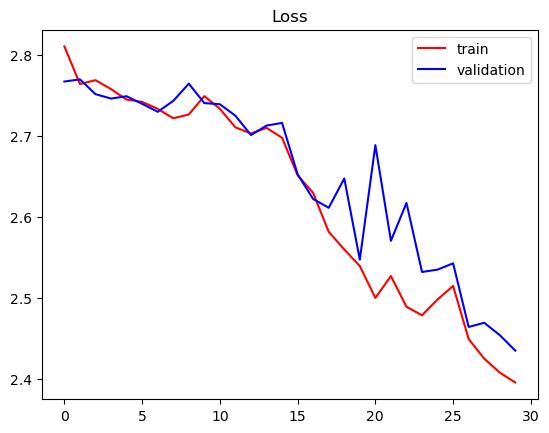

In [125]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [126]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 12s 575ms/step
Confusion Matrix:
[[ 0  3  0  1  0  0  3  1  1  1  0 12  0  0  0  6]
 [ 0 12  0  3  0  0  1  3  2  0  0 16  0  0  0  2]
 [ 0  3  1  0  0  0 12  1  1  1  1 14  1  0  0  6]
 [ 0  2  0 19  0  0  0  7  0  0  0  5  0  0  0  0]
 [ 0  1  0  0  1  0 10  2  5  0  0  6  0  0  0  4]
 [ 0  2  0  4  0  1  1  8  0  0  0 16  0  0  1  0]
 [ 0  0  0  0  0  0 23  0  8  0  0  3  0  0  0  6]
 [ 0  5  0 13  0  0  2  5  0  1  0 11  0  0  0  1]
 [ 0  0  0  0  0  0 15  0 13  2  0  2  0  0  0  3]
 [ 0  1  0  0  0  0  6  1  4  1  3 10  0  0  0  7]
 [ 0  3  0  3  0  0  8  0  1  2  2 12  0  0  0  5]
 [ 0  4  0  1  0  0  1  5  2  0  0 19  0  0  0 11]
 [ 0  2  0  0  1  0 10  2  6  0  0  6  0  0  0  7]
 [ 0  3  0 15  0  0  0  1  0  0  0 11  0  0  0  1]
 [ 0  1  1  0  1  0  6  2  4  0  0 12  0  0  0 11]
 [ 0  1  1  0  0  0  3  0 12  0  0 11  0  0  0  8]]


18/18 [==============================] - 12s 572ms/step


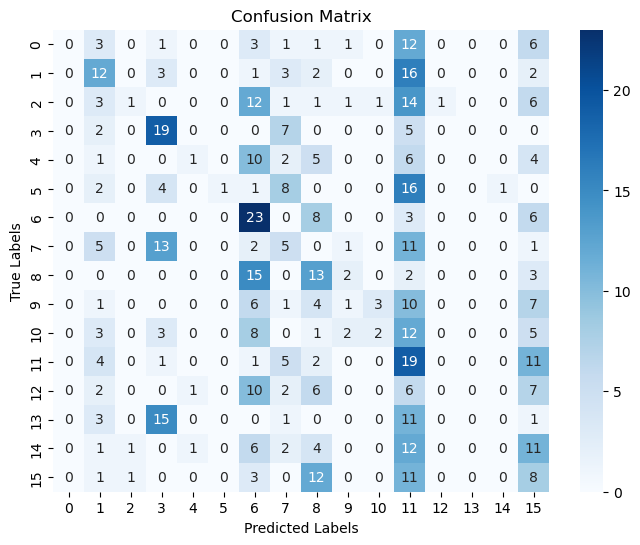

In [127]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [128]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.3077, FPR = 0.0587, TNR = 0.9413, FNR = 0.6923
Class 2: TPR = 0.0244, FPR = 0.0038, TNR = 0.9962, FNR = 0.9756
Class 3: TPR = 0.5758, FPR = 0.0749, TNR = 0.9251, FNR = 0.4242
Class 4: TPR = 0.0345, FPR = 0.0037, TNR = 0.9963, FNR = 0.9655
Class 5: TPR = 0.0303, FPR = 0.0000, TNR = 1.0000, FNR = 0.9697
Class 6: TPR = 0.5750, FPR = 0.1480, TNR = 0.8520, FNR = 0.4250
Class 7: TPR = 0.1316, FPR = 0.0624, TNR = 0.9376, FNR = 0.8684
Class 8: TPR = 0.3714, FPR = 0.0865, TNR = 0.9135, FNR = 0.6286
Class 9: TPR = 0.0303, FPR = 0.0131, TNR = 0.9869, FNR = 0.9697
Class 10: TPR = 0.0556, FPR = 0.0075, TNR = 0.9925, FNR = 0.9444
Class 11: TPR = 0.4419, FPR = 0.2805, TNR = 0.7195, FNR = 0.5581
Class 12: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 15: TPR = 0.2222, FPR = 0.131

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


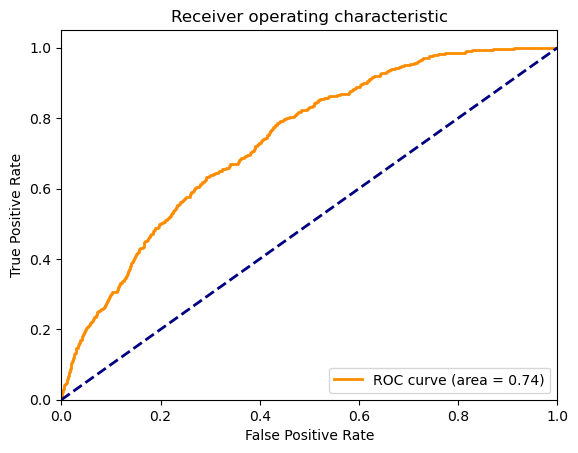

In [129]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 10s 514ms/step - loss: 2.4350 - accuracy: 0.1852
Test Loss: 2.4350152015686035
Test Accuracy: 0.18518517911434174
18/18 [==============================] - 12s 612ms/step
AUC for class 0: 0.5780
AUC for class 1: 0.7574
AUC for class 2: 0.5932
AUC for class 3: 0.9244
AUC for class 4: 0.7039
AUC for class 5: 0.7444
AUC for class 6: 0.8322
AUC for class 7: 0.8181
AUC for class 8: 0.8751
AUC for class 9: 0.6462
AUC for class 10: 0.6556
AUC for class 11: 0.6429
AUC for class 12: 0.6806
AUC for class 13: 0.8350
AUC for class 14: 0.5882
AUC for class 15: 0.6861


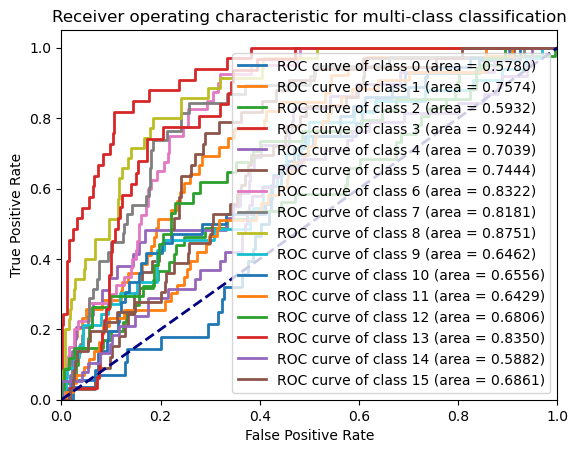

In [130]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 35 Epoch

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=35, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/35
38/38 [==============================] - 137s 2s/step - loss: 2.7997 - accuracy: 0.0711 - val_loss: 2.7715 - val_accuracy: 0.0776
Epoch 2/35
38/38 [==============================] - 61s 2s/step - loss: 2.7616 - accuracy: 0.0870 - val_loss: 2.7734 - val_accuracy: 0.0723
Epoch 3/35
38/38 [==============================] - 63s 2s/step - loss: 2.7584 - accuracy: 0.0870 - val_loss: 2.7533 - val_accuracy: 0.0864
Epoch 4/35
38/38 [==============================] - 62s 2s/step - loss: 2.7504 - accuracy: 0.0946 - val_loss: 2.7498 - val_accuracy: 0.0723
Epoch 5/35
38/38 [==============================] - 45s 1s/step - loss: 2.7480 - accuracy: 0.1004 - val_loss: 2.7479 - val_accuracy: 0.1058
Epoch 6/35
38/38 [==============================] - 54s 1s/step - loss: 2.7407 - accuracy: 0.0987 - val_loss: 2.7430 - val_accuracy: 0.0811
Epoch 7/35
38/38 [==============================] - 64s 2s/step - loss: 2.7317 - accuracy: 0.1013 - val_loss: 2.7409 - val_accuracy: 0.0988
Epoch 8/35
38/38 [=

In [132]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 12s 561ms/step - loss: 2.3503 - accuracy: 0.1834
Test Loss: 2.3503220081329346
Test Accuracy: 0.1834215223789215
18/18 [==============================] - 22s 591ms/step


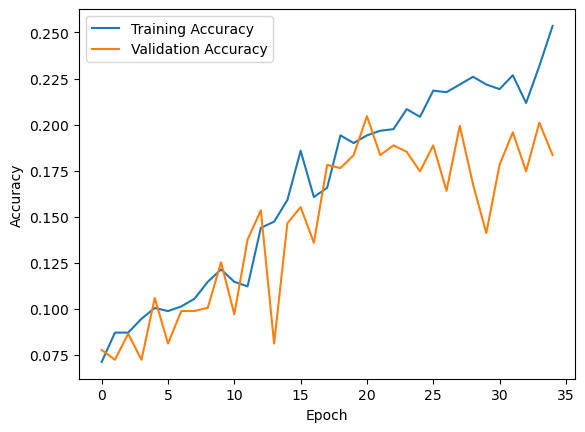

In [133]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

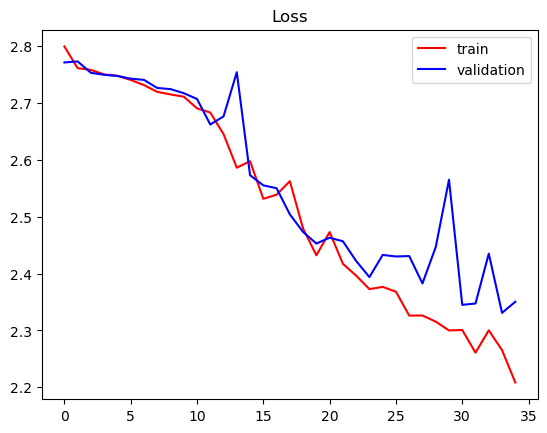

In [134]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [135]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 11s 518ms/step
Confusion Matrix:
[[ 1  0  4  1  0  0  0  9  0  1  1  6  1  0  0  4]
 [ 0  5  3 11  0  0  0  8  0  2  1  8  0  0  0  1]
 [ 0  3  6  2  0  0  2  4  1  0  1 13  5  0  0  4]
 [ 0  1  0 24  0  1  0  7  0  0  0  0  0  0  0  0]
 [ 1  2  7  1  1  0  6  2  0  0  0  1  4  0  0  4]
 [ 0  0  4 10  0  1  1 13  0  1  0  3  0  0  0  0]
 [ 0  0  3  0  0  0 11  1  2  0  2  5  9  0  0  7]
 [ 0  2  3 17  0  0  0 13  0  1  0  2  0  0  0  0]
 [ 0  0  1  0  0  0  8  0 12  1  3  1  3  0  0  6]
 [ 0  2  4  1  1  0  1  3  0  4  5  9  1  0  0  2]
 [ 0  5  5  6  0  0  2  1  0  4  0 11  1  0  0  1]
 [ 1  3  8  6  0  0  0  8  0  1  1 11  2  0  1  1]
 [ 0  1  9  0  0  0  4  1  1  1  3  2  5  0  1  6]
 [ 0  1  0 20  0  0  0  4  0  1  0  5  0  0  0  0]
 [ 0  0 12  1  0  0  2  2  0  3  0  6  2  0  1  9]
 [ 0  1  5  0  0  0  2  2  3  0  0 10  4  0  0  9]]


18/18 [==============================] - 11s 506ms/step


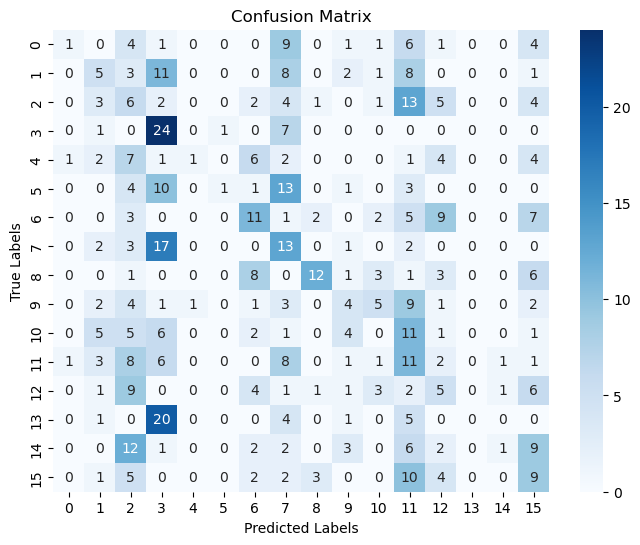

In [136]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [137]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0357, FPR = 0.0037, TNR = 0.9963, FNR = 0.9643
Class 1: TPR = 0.1282, FPR = 0.0398, TNR = 0.9602, FNR = 0.8718
Class 2: TPR = 0.1463, FPR = 0.1293, TNR = 0.8707, FNR = 0.8537
Class 3: TPR = 0.7273, FPR = 0.1423, TNR = 0.8577, FNR = 0.2727
Class 4: TPR = 0.0345, FPR = 0.0019, TNR = 0.9981, FNR = 0.9655
Class 5: TPR = 0.0303, FPR = 0.0019, TNR = 0.9981, FNR = 0.9697
Class 6: TPR = 0.2750, FPR = 0.0531, TNR = 0.9469, FNR = 0.7250
Class 7: TPR = 0.3421, FPR = 0.1229, TNR = 0.8771, FNR = 0.6579
Class 8: TPR = 0.3429, FPR = 0.0132, TNR = 0.9868, FNR = 0.6571
Class 9: TPR = 0.1212, FPR = 0.0300, TNR = 0.9700, FNR = 0.8788
Class 10: TPR = 0.0000, FPR = 0.0320, TNR = 0.9680, FNR = 1.0000
Class 11: TPR = 0.2558, FPR = 0.1565, TNR = 0.8435, FNR = 0.7442
Class 12: TPR = 0.1471, FPR = 0.0600, TNR = 0.9400, FNR = 0.8529
Class 13: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 14: TPR = 0.0263, FPR = 0.0038, TNR = 0.9962, FNR = 0.9737
Class 15: TPR = 0.2500, FPR = 0.084

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)


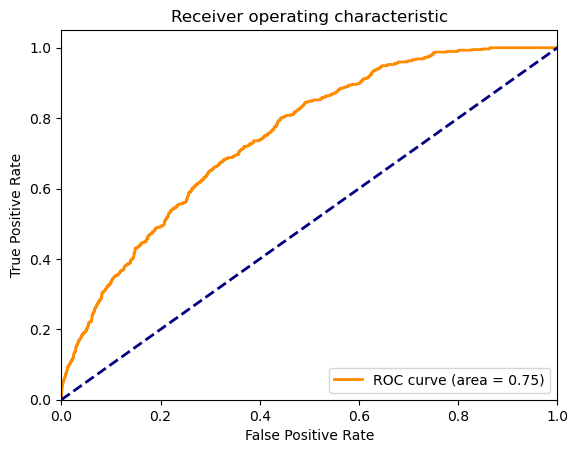

In [138]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 8s 401ms/step - loss: 2.3503 - accuracy: 0.1834
Test Loss: 2.3503220081329346
Test Accuracy: 0.1834215223789215
18/18 [==============================] - 10s 521ms/step
AUC for class 0: 0.6287
AUC for class 1: 0.7872
AUC for class 2: 0.5788
AUC for class 3: 0.9329
AUC for class 4: 0.7218
AUC for class 5: 0.7614
AUC for class 6: 0.8391
AUC for class 7: 0.8124
AUC for class 8: 0.9334
AUC for class 9: 0.6382
AUC for class 10: 0.6566
AUC for class 11: 0.6291
AUC for class 12: 0.7593
AUC for class 13: 0.8605
AUC for class 14: 0.6328
AUC for class 15: 0.7119


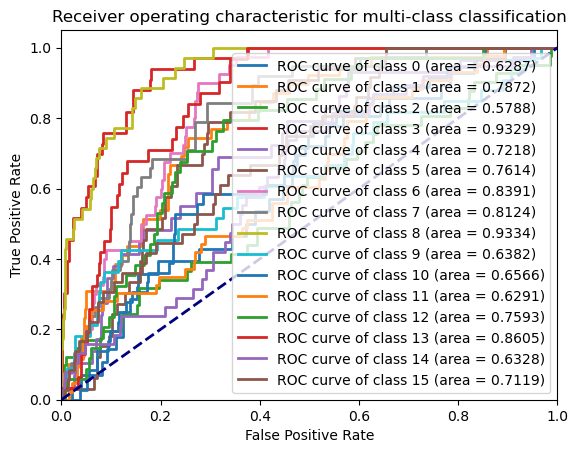

In [139]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 40 Epoch

In [140]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=40, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/40
38/38 [==============================] - 109s 2s/step - loss: 2.8082 - accuracy: 0.0594 - val_loss: 2.7788 - val_accuracy: 0.0758
Epoch 2/40
38/38 [==============================] - 63s 2s/step - loss: 2.7723 - accuracy: 0.0845 - val_loss: 2.7597 - val_accuracy: 0.0794
Epoch 3/40
38/38 [==============================] - 57s 2s/step - loss: 2.7654 - accuracy: 0.0753 - val_loss: 2.7648 - val_accuracy: 0.0705
Epoch 4/40
38/38 [==============================] - 61s 2s/step - loss: 2.7549 - accuracy: 0.0854 - val_loss: 2.7538 - val_accuracy: 0.0811
Epoch 5/40
38/38 [==============================] - 64s 2s/step - loss: 2.7508 - accuracy: 0.0987 - val_loss: 2.7537 - val_accuracy: 0.0899
Epoch 6/40
38/38 [==============================] - 64s 2s/step - loss: 2.7498 - accuracy: 0.0803 - val_loss: 2.7458 - val_accuracy: 0.0970
Epoch 7/40
38/38 [==============================] - 62s 2s/step - loss: 2.7472 - accuracy: 0.0979 - val_loss: 2.7524 - val_accuracy: 0.1041
Epoch 8/40
38/38 [=

In [141]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 12s 564ms/step - loss: 2.3738 - accuracy: 0.1711
Test Loss: 2.3738150596618652
Test Accuracy: 0.17107583582401276
18/18 [==============================] - 24s 597ms/step


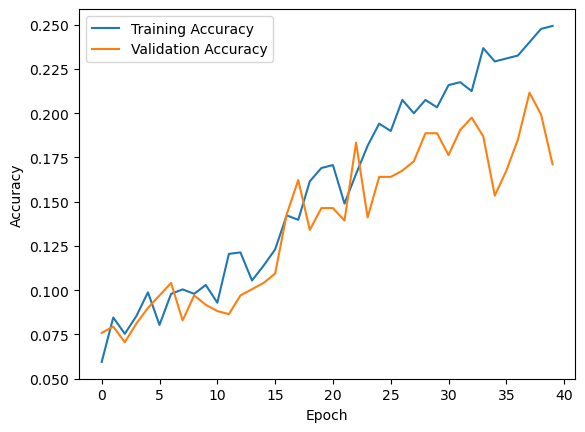

In [142]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

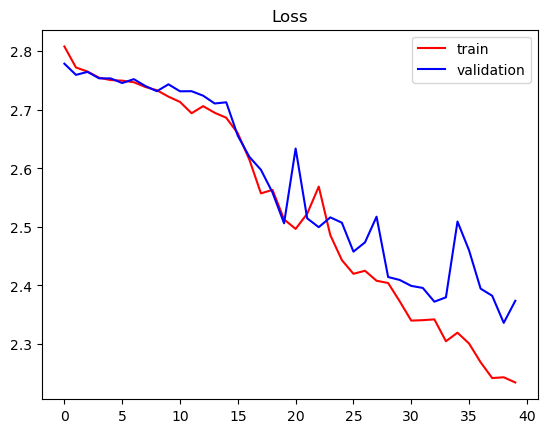

In [143]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [144]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 13s 600ms/step
Confusion Matrix:
[[ 0  2  0 11  0  0  0  1  0  0  1  7  0  2  0  4]
 [ 0  7  0 20  0  0  0  0  0  0  5  5  0  1  0  1]
 [ 0  3  2  7  0  0  4  3  0  0  6  7  1  0  0  8]
 [ 0  0  0 31  0  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  4  0  3  2  0  7  3  0  0  0  1  1  1  0  7]
 [ 0  0  0 23  0  2  1  1  0  0  0  5  0  1  0  0]
 [ 0  0  0  0  1  0 18  0  2  0  5  5  0  0  1  8]
 [ 0  2  1 26  0  1  1  3  0  0  0  3  0  1  0  0]
 [ 0  0  0  0  1  0 17  0  9  0  1  0  1  0  0  6]
 [ 0  2  0  6  0  0  3  2  0  0  9  8  1  0  0  2]
 [ 0  7  0 11  0  0  1  1  1  0  5  7  0  0  0  3]
 [ 0  6  2 13  0  0  2  4  0  0  3 10  0  0  0  3]
 [ 0  4  0  1  0  0  6  3  0  0  4  5  1  0  0 10]
 [ 0  1  0 24  0  0  0  2  0  0  0  3  0  1  0  0]
 [ 0  5  2  8  0  2  1  2  1  0  5  6  0  0  0  6]
 [ 0  2  2  4  0  0  2  1  3  0  6 10  0  0  0  6]]


18/18 [==============================] - 12s 590ms/step


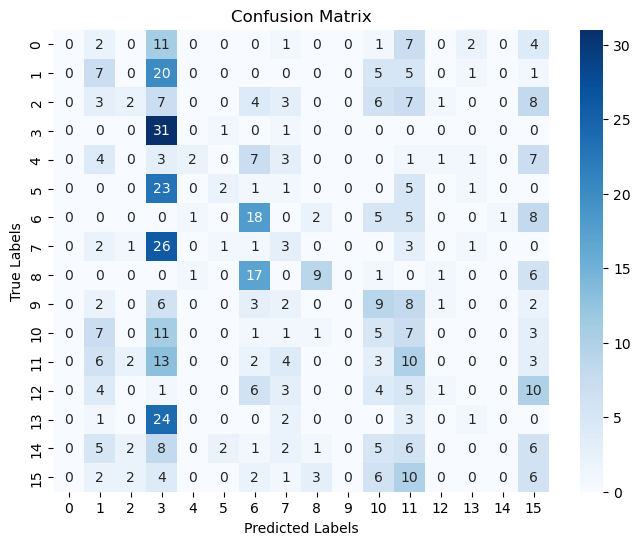

In [145]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [146]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 1: TPR = 0.1795, FPR = 0.0720, TNR = 0.9280, FNR = 0.8205
Class 2: TPR = 0.0488, FPR = 0.0133, TNR = 0.9867, FNR = 0.9512
Class 3: TPR = 0.9394, FPR = 0.2940, TNR = 0.7060, FNR = 0.0606
Class 4: TPR = 0.0690, FPR = 0.0037, TNR = 0.9963, FNR = 0.9310
Class 5: TPR = 0.0606, FPR = 0.0075, TNR = 0.9925, FNR = 0.9394
Class 6: TPR = 0.4500, FPR = 0.0854, TNR = 0.9146, FNR = 0.5500
Class 7: TPR = 0.0789, FPR = 0.0454, TNR = 0.9546, FNR = 0.9211
Class 8: TPR = 0.2571, FPR = 0.0132, TNR = 0.9868, FNR = 0.7429
Class 9: TPR = 0.0000, FPR = 0.0000, TNR = 1.0000, FNR = 1.0000
Class 10: TPR = 0.1389, FPR = 0.0847, TNR = 0.9153, FNR = 0.8611
Class 11: TPR = 0.2326, FPR = 0.1374, TNR = 0.8626, FNR = 0.7674
Class 12: TPR = 0.0294, FPR = 0.0075, TNR = 0.9925, FNR = 0.9706
Class 13: TPR = 0.0323, FPR = 0.0112, TNR = 0.9888, FNR = 0.9677
Class 14: TPR = 0.0000, FPR = 0.0019, TNR = 0.9981, FNR = 1.0000
Class 15: TPR = 0.1667, FPR = 0.109

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:25: RuntimeWarning: invalid value encountered in longlong_scalars
  precision[i]= tp / (tp + fp)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


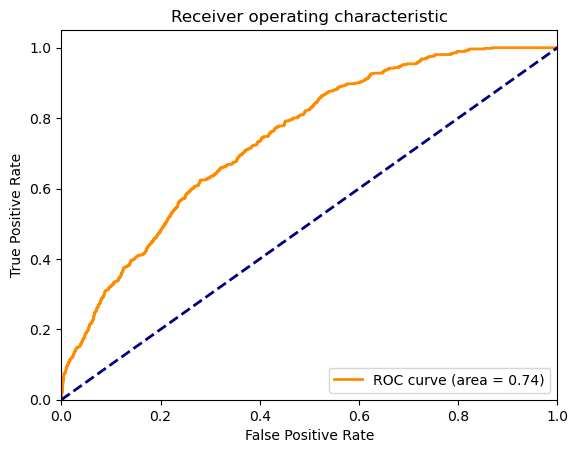

In [147]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 13s 597ms/step - loss: 2.3738 - accuracy: 0.1711
Test Loss: 2.3738150596618652
Test Accuracy: 0.17107583582401276
18/18 [==============================] - 12s 559ms/step
AUC for class 0: 0.5519
AUC for class 1: 0.7556
AUC for class 2: 0.6021
AUC for class 3: 0.9343
AUC for class 4: 0.7214
AUC for class 5: 0.7623
AUC for class 6: 0.8665
AUC for class 7: 0.8089
AUC for class 8: 0.9274
AUC for class 9: 0.5992
AUC for class 10: 0.6362
AUC for class 11: 0.6103
AUC for class 12: 0.7336
AUC for class 13: 0.8581
AUC for class 14: 0.5901
AUC for class 15: 0.6853


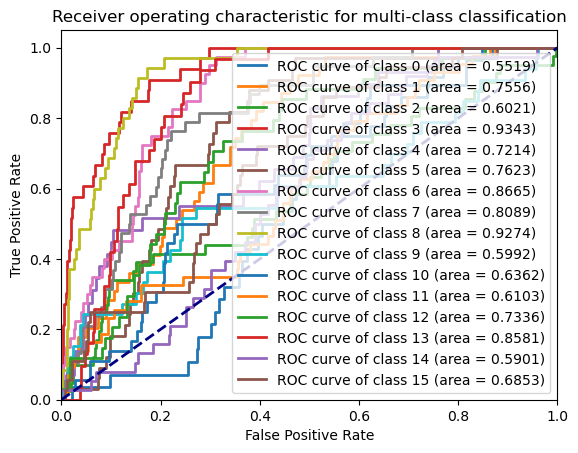

In [148]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 80 Epoch

In [149]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=80, batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/80
38/38 [==============================] - 164s 2s/step - loss: 2.8127 - accuracy: 0.0661 - val_loss: 2.7681 - val_accuracy: 0.0776
Epoch 2/80
38/38 [==============================] - 76s 2s/step - loss: 2.7713 - accuracy: 0.0787 - val_loss: 2.7627 - val_accuracy: 0.0864
Epoch 3/80
38/38 [==============================] - 74s 2s/step - loss: 2.7645 - accuracy: 0.0862 - val_loss: 2.7608 - val_accuracy: 0.0705
Epoch 4/80
38/38 [==============================] - 75s 2s/step - loss: 2.7575 - accuracy: 0.0904 - val_loss: 2.7634 - val_accuracy: 0.0705
Epoch 5/80
38/38 [==============================] - 74s 2s/step - loss: 2.7626 - accuracy: 0.0787 - val_loss: 2.7589 - val_accuracy: 0.0776
Epoch 6/80
38/38 [==============================] - 66s 2s/step - loss: 2.7508 - accuracy: 0.0879 - val_loss: 2.7483 - val_accuracy: 0.0829
Epoch 7/80
38/38 [==============================] - 67s 2s/step - loss: 2.7431 - accuracy: 0.0937 - val_loss: 2.7470 - val_accuracy: 0.0811
Epoch 8/80
38/38 [=

In [150]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 5s 266ms/step - loss: 2.2293 - accuracy: 0.2840
Test Loss: 2.2292802333831787
Test Accuracy: 0.2839506268501282
18/18 [==============================] - 9s 233ms/step


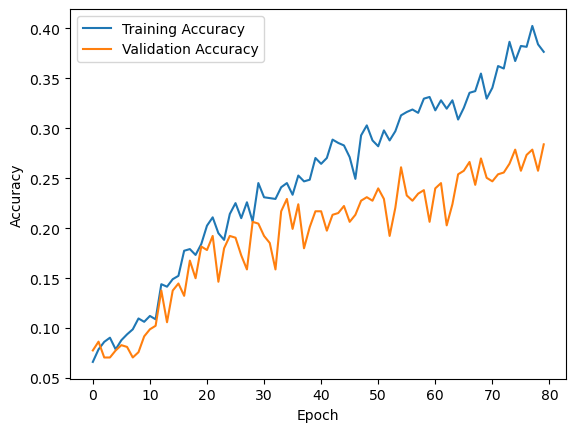

In [151]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

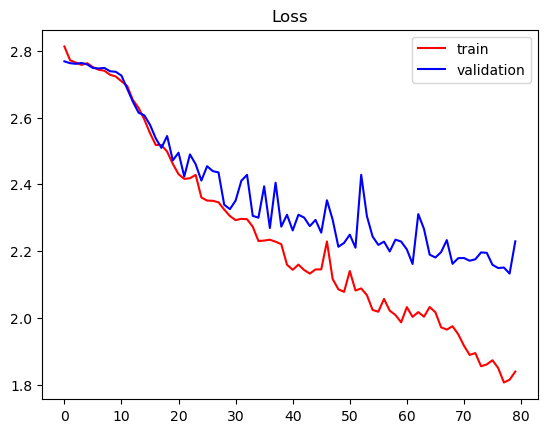

In [152]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [153]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 4s 242ms/step
Confusion Matrix:
[[ 0  0  8  0  0  1  2  0  0  0  2  2  0  0 11  2]
 [ 0 16  5  0  1  0  0  0  0  1  5  2  0  2  6  1]
 [ 0  3 14  0  1  1  1  0  0  0  5  2  3  0  6  5]
 [ 0  3  0 15  0  3  0  4  0  0  0  1  0  6  1  0]
 [ 0  0  5  0  4  0  6  0  1  0  1  0  2  2  4  4]
 [ 0  5  7  1  0  7  0  0  0  0  0  1  0  5  6  1]
 [ 0  0  0  0  3  0 23  0  3  0  0  1  0  0  6  4]
 [ 0  2  6  4  0  8  0  5  0  0  1  3  0  2  5  2]
 [ 0  0  0  0  1  0 11  0 18  0  0  1  1  0  2  1]
 [ 0  1  5  0  0  0  3  0  0  5  7  4  1  0  5  2]
 [ 0  3  2  1  1  1  5  0  0  2  9  0  0  1  8  3]
 [ 2  1 14  0  1  2  1  0  0  4  1  1  0  3 12  1]
 [ 0  0  2  0  1  0  8  0  0  0  1  1  6  0  7  8]
 [ 0  5  3  1  0  3  0  1  0  0  1  3  0 11  3  0]
 [ 0  0  8  0  0  0  1  0  0  1  0  0  1  0 16 11]
 [ 1  1  7  0  2  0  5  0  0  0  0  0  0  0  9 11]]


18/18 [==============================] - 5s 274ms/step


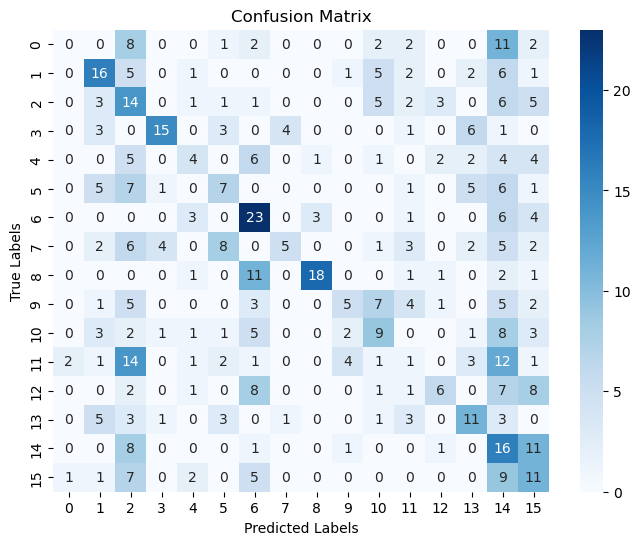

In [154]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [155]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.0000, FPR = 0.0056, TNR = 0.9944, FNR = 1.0000
Class 1: TPR = 0.4103, FPR = 0.0455, TNR = 0.9545, FNR = 0.5897
Class 2: TPR = 0.3415, FPR = 0.1369, TNR = 0.8631, FNR = 0.6585
Class 3: TPR = 0.4545, FPR = 0.0131, TNR = 0.9869, FNR = 0.5455
Class 4: TPR = 0.1379, FPR = 0.0204, TNR = 0.9796, FNR = 0.8621
Class 5: TPR = 0.2121, FPR = 0.0356, TNR = 0.9644, FNR = 0.7879
Class 6: TPR = 0.5750, FPR = 0.0816, TNR = 0.9184, FNR = 0.4250
Class 7: TPR = 0.1316, FPR = 0.0095, TNR = 0.9905, FNR = 0.8684
Class 8: TPR = 0.5143, FPR = 0.0075, TNR = 0.9925, FNR = 0.4857
Class 9: TPR = 0.1515, FPR = 0.0150, TNR = 0.9850, FNR = 0.8485
Class 10: TPR = 0.2500, FPR = 0.0452, TNR = 0.9548, FNR = 0.7500
Class 11: TPR = 0.0233, FPR = 0.0401, TNR = 0.9599, FNR = 0.9767
Class 12: TPR = 0.1765, FPR = 0.0150, TNR = 0.9850, FNR = 0.8235
Class 13: TPR = 0.3548, FPR = 0.0392, TNR = 0.9608, FNR = 0.6452
Class 14: TPR = 0.4211, FPR = 0.1720, TNR = 0.8280, FNR = 0.5789
Class 15: TPR = 0.3056, FPR = 0.084

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2268\3402790651.py:27: RuntimeWarning: invalid value encountered in double_scalars
  f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])


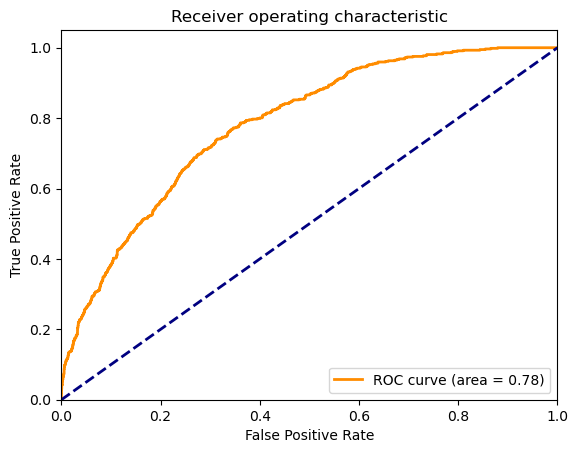

In [156]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 5s 247ms/step - loss: 2.2293 - accuracy: 0.2840
Test Loss: 2.2292802333831787
Test Accuracy: 0.2839506268501282
18/18 [==============================] - 5s 257ms/step
AUC for class 0: 0.6842
AUC for class 1: 0.8099
AUC for class 2: 0.6656
AUC for class 3: 0.9494
AUC for class 4: 0.7384
AUC for class 5: 0.7880
AUC for class 6: 0.8903
AUC for class 7: 0.7872
AUC for class 8: 0.9353
AUC for class 9: 0.7388
AUC for class 10: 0.7083
AUC for class 11: 0.6014
AUC for class 12: 0.8458
AUC for class 13: 0.8624
AUC for class 14: 0.7311
AUC for class 15: 0.7113


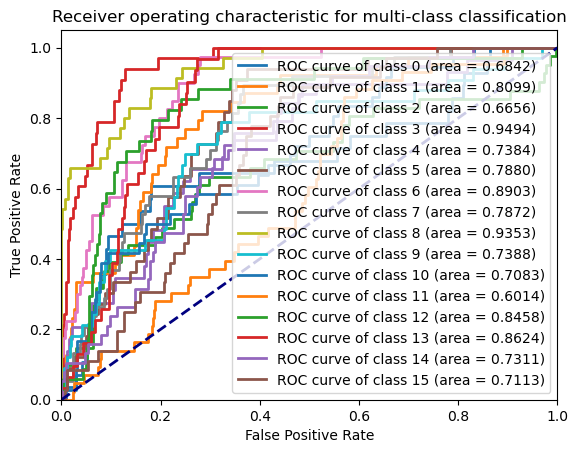

In [157]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()

## 200 Epoch

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(519, 276)))
model.add(Dense(units=16, activation='sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTM model
history=model.fit(x_train, y_train, epochs=200
                  
                  
                  , batch_size=32,validation_data=(x_val,y_val))

# # Evaluate the LSTM model
# test_loss, test_accuracy = model.evaluate(x_val, y_val)
# print('Test Loss:', test_loss)
# print('Test Accuracy:', test_accuracy)

# # Make predictions with the LSTM model
# predictions = model.predict(x_val)

Epoch 1/200
38/38 [==============================] - 74s 1s/step - loss: 2.8052 - accuracy: 0.0644 - val_loss: 2.7660 - val_accuracy: 0.0758
Epoch 2/200
38/38 [==============================] - 29s 772ms/step - loss: 2.7645 - accuracy: 0.0703 - val_loss: 2.7598 - val_accuracy: 0.0811
Epoch 3/200
38/38 [==============================] - 29s 771ms/step - loss: 2.7702 - accuracy: 0.0728 - val_loss: 2.7547 - val_accuracy: 0.0829
Epoch 4/200
38/38 [==============================] - 29s 764ms/step - loss: 2.7524 - accuracy: 0.0946 - val_loss: 2.7511 - val_accuracy: 0.0935
Epoch 5/200
38/38 [==============================] - 30s 791ms/step - loss: 2.7435 - accuracy: 0.0837 - val_loss: 2.7497 - val_accuracy: 0.1005
Epoch 6/200
38/38 [==============================] - 29s 767ms/step - loss: 2.7460 - accuracy: 0.0887 - val_loss: 2.7505 - val_accuracy: 0.0882
Epoch 7/200
38/38 [==============================] - 28s 751ms/step - loss: 2.7486 - accuracy: 0.0870 - val_loss: 2.7390 - val_accuracy: 0.

In [159]:
# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

18/18 [==============================] - 5s 275ms/step - loss: 2.3294 - accuracy: 0.3457
Test Loss: 2.329432249069214
Test Accuracy: 0.34567901492118835
18/18 [==============================] - 9s 260ms/step


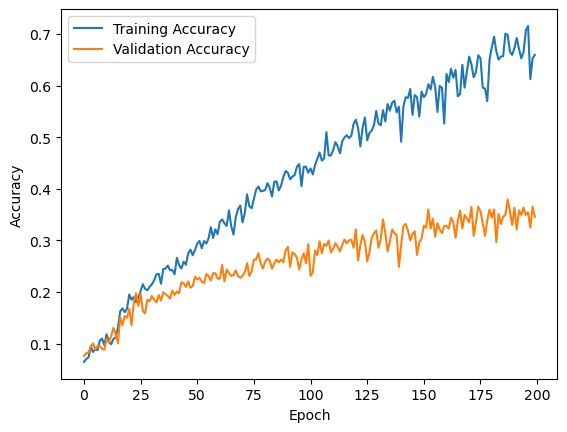

In [160]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Plot epoch vs accuracy for training and testing data
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

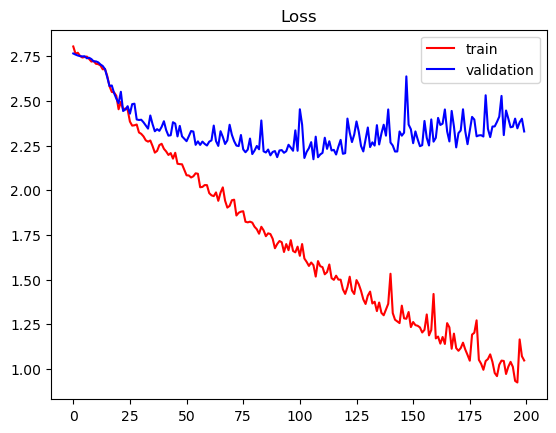

In [161]:
#loss graph
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Loss')
plt.legend()
plt.show()

#here we plotted training loss and validation loss
#as epochs increases traing_loss is reducing but validation loss is increaing and again the gap between two graphs in 
#increasing which indiacates overfitting of mode

# overfitting means our model giving good results on training data but on test data it not performing well

In [162]:
# Generate confusion matrix
y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
print('Confusion Matrix:')
print(cm)

18/18 [==============================] - 5s 275ms/step
Confusion Matrix:
[[ 4  1  6  0  1  4  0  0  0  0  0  6  0  0  2  4]
 [ 0  8  1  3  0  1  0  1  0  1  5  3  1 11  4  0]
 [ 1  1 17  1  0  1  1  2  0  0  2  5  2  1  2  5]
 [ 0  1  0 25  0  5  0  1  0  0  0  1  0  0  0  0]
 [ 0  0  1  1  7  3  2  0  4  0  0  0  3  0  2  6]
 [ 0  0  4  4  1 14  0  0  0  0  0  2  0  4  3  1]
 [ 0  0  6  0  2  0 16  0  2  0  0  3  3  0  3  5]
 [ 1  2  2 13  0  6  1  5  0  1  0  4  0  2  0  1]
 [ 0  0  1  0  1  0  7  0 17  0  1  1  2  0  1  4]
 [ 1  5  3  0  1  3  1  0  0  8  5  4  0  0  1  1]
 [ 0  2  5  3  1  1  1  1  0  1  7  6  1  2  3  2]
 [ 2  1 10  1  0  3  1  2  0  0  1 16  2  0  1  3]
 [ 0  0  3  0  2  0  4  0  1  0  0  1 15  0  1  7]
 [ 0  0  1 17  0  1  0  1  0  0  0  0  0 11  0  0]
 [ 3  1  9  0  2  3  1  1  0  0  0  6  1  0  8  3]
 [ 1  0  7  0  1  0  1  1  1  0  0  2  0  0  4 18]]


18/18 [==============================] - 5s 279ms/step


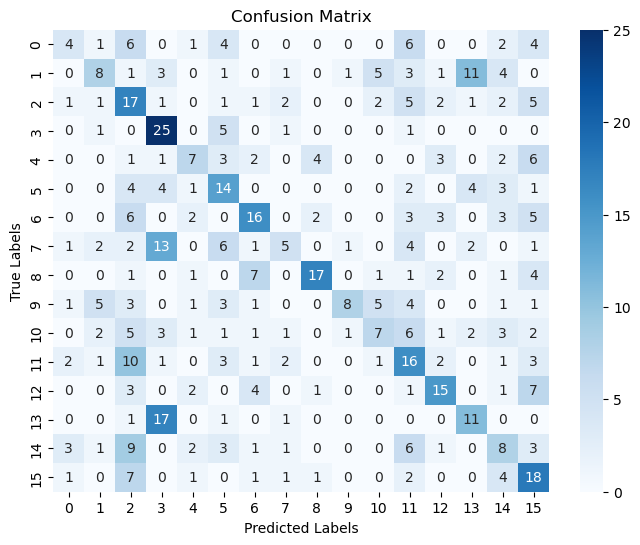

In [163]:
import seaborn as sns
# Generate confusion matrix

y_pred = model.predict(x_val)
cm = confusion_matrix(np.argmax(y_val, axis=1), np.argmax(y_pred, axis=1))
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [164]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np

def calculate_metrics(confusion_matrix):
    num_classes = confusion_matrix.shape[0]
    tpr = np.zeros(num_classes)
    fpr = np.zeros(num_classes)
    tnr = np.zeros(num_classes)
    fnr = np.zeros(num_classes)
    precision =  np.zeros(num_classes)
    recall = np.zeros(num_classes)
    f1 = np.zeros(num_classes)
    for i in range(num_classes):
        tp = confusion_matrix[i,i]
        fn = np.sum(confusion_matrix[i,:]) - tp
        fp = np.sum(confusion_matrix[:,i]) - tp
        tn = np.sum(confusion_matrix) - tp - fn - fp

        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)
        tnr[i] = tn / (tn + fp)
        fnr[i] = fn / (tp + fn)
        precision[i]= tp / (tp + fp)
        recall[i] = tp / (tp + fn)
        f1[i]  =  2*(precision[i]*recall[i]) / (precision[i] + recall[i])

    return tpr, fpr, tnr, fnr, precision,recall,f1

# Example usage
confusion_matrix = cm
# np.array([[100, 10, 0, ..., 0], [20, 70, 0, ..., 0], [0, 0, 80, ..., 0], ..., [0, 0, 0, ..., 90]])
tpr, fpr, tnr, fnr ,precision,recall,f1 = calculate_metrics(confusion_matrix)

# precision, recall, fscore, support = precision_recall_fscore_support(y_true_classes, y_pred_classes)

# print the precision, recall, and F1-score for each class
TPR=0
FPR=0
TNR=0
FNR=0
Precision=0
Recall=0
F1=0

for i in range(len(precision)):    
    print(f'Class {i}: TPR = {tpr[i]:.4f}, FPR = {fpr[i]:.4f}, TNR = {tnr[i]:.4f}, FNR = {fnr[i]:.4f}')
    TPR=TPR+tpr[i]
    FPR=FPR+fpr[i]
    TNR=TNR+tnr[i]
    FNR=FNR+fnr[i]
  
for i in range(len(precision)):
    print(f'Class {i}: Precision = {precision[i]:.4f}, Recall = {recall[i]:.4f}, F1-score = {f1[i]:.4f}')
    Precision=Precision + precision[i]
    Recall = Recall + recall[i]
    F1 = F1 + f1[i]

print("TPR:", TPR/16)
print("FPR:", FPR/16)
print("TNR:", TNR/16)
print("FNR:", FNR/16)
print("precision : ",Precision/16)
print("recall : ",Recall/16)
print("f1 : ",F1/16)

Class 0: TPR = 0.1429, FPR = 0.0167, TNR = 0.9833, FNR = 0.8571
Class 1: TPR = 0.2051, FPR = 0.0265, TNR = 0.9735, FNR = 0.7949
Class 2: TPR = 0.4146, FPR = 0.1122, TNR = 0.8878, FNR = 0.5854
Class 3: TPR = 0.7576, FPR = 0.0805, TNR = 0.9195, FNR = 0.2424
Class 4: TPR = 0.2414, FPR = 0.0223, TNR = 0.9777, FNR = 0.7586
Class 5: TPR = 0.4242, FPR = 0.0581, TNR = 0.9419, FNR = 0.5758
Class 6: TPR = 0.4000, FPR = 0.0380, TNR = 0.9620, FNR = 0.6000
Class 7: TPR = 0.1316, FPR = 0.0189, TNR = 0.9811, FNR = 0.8684
Class 8: TPR = 0.4857, FPR = 0.0150, TNR = 0.9850, FNR = 0.5143
Class 9: TPR = 0.2424, FPR = 0.0056, TNR = 0.9944, FNR = 0.7576
Class 10: TPR = 0.1944, FPR = 0.0264, TNR = 0.9736, FNR = 0.8056
Class 11: TPR = 0.3721, FPR = 0.0840, TNR = 0.9160, FNR = 0.6279
Class 12: TPR = 0.4412, FPR = 0.0281, TNR = 0.9719, FNR = 0.5588
Class 13: TPR = 0.3548, FPR = 0.0373, TNR = 0.9627, FNR = 0.6452
Class 14: TPR = 0.2105, FPR = 0.0510, TNR = 0.9490, FNR = 0.7895
Class 15: TPR = 0.5000, FPR = 0.079

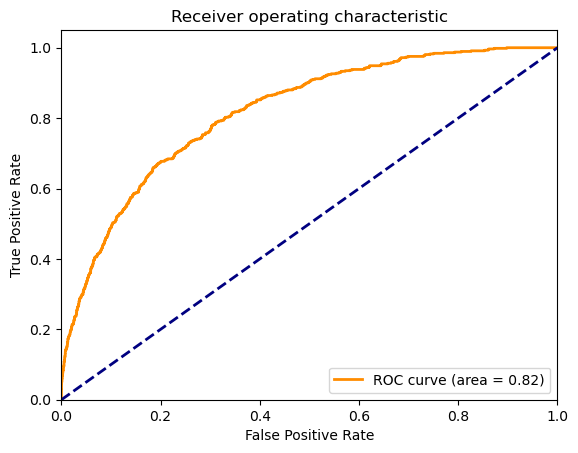

In [165]:
# Generate AUC and ROC curve
fpr, tpr, _ = roc_curve(y_val.ravel(), y_pred.ravel())
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

18/18 [==============================] - 5s 291ms/step - loss: 2.3294 - accuracy: 0.3457
Test Loss: 2.329432249069214
Test Accuracy: 0.34567901492118835
18/18 [==============================] - 5s 262ms/step
AUC for class 0: 0.7161
AUC for class 1: 0.8628
AUC for class 2: 0.7252
AUC for class 3: 0.9465
AUC for class 4: 0.8087
AUC for class 5: 0.7532
AUC for class 6: 0.8501
AUC for class 7: 0.8160
AUC for class 8: 0.9223
AUC for class 9: 0.7574
AUC for class 10: 0.7061
AUC for class 11: 0.7641
AUC for class 12: 0.8955
AUC for class 13: 0.9343
AUC for class 14: 0.7121
AUC for class 15: 0.8127


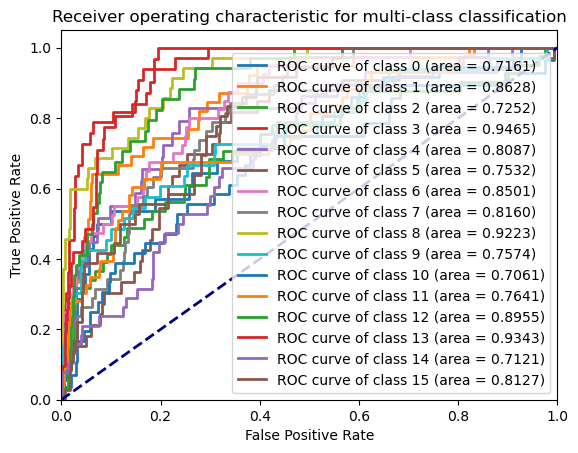

In [166]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Evaluate the LSTM model
test_loss, test_accuracy = model.evaluate(x_val, y_val)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)

# Make predictions with the LSTM model
predictions = model.predict(x_val)

# Calculate AUC for each class
n_classes = predictions.shape[1]
aucs = []
for i in range(n_classes):
    auc_i = roc_auc_score(y_val[:, i], predictions[:, i])
    print(f"AUC for class {i}: {auc_i:.4f}")
    aucs.append(auc_i)

# Plot ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
lw = 2
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=lw, label='ROC curve of class {0} (area = {1:0.4f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class classification')
plt.legend(loc="lower right")
plt.show()